<a href="https://colab.research.google.com/github/pratik9409/assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nolds

  Using cached https://files.pythonhosted.org/packages/67/28/60d734bb74181f3a36d685c63b18481789fd54d6c25124662e7195e2d5ed/nolds-0.5.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nolds

In [ ]:
data1=pd.read_csv("E:\TerraBlue_XT\intern_dataset.csv")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
Time       912000 non-null object
Signal1    912000 non-null float64
Signal2    912000 non-null float64
Label      912000 non-null object
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [ ]:
data1.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [ ]:
data1.isnull().any()

Time       False
Signal1    False
Signal2    False
Label      False
dtype: bool

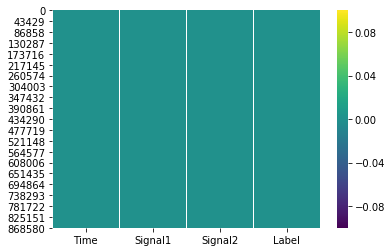

In [ ]:
sns.heatmap(data1.isnull(), cmap='viridis')

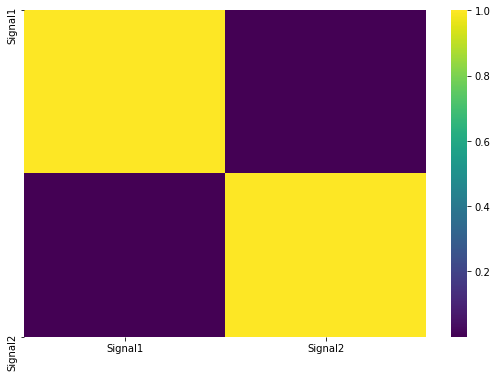

In [ ]:
data1_corr=data1.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data1_corr,cmap='viridis')


In [ ]:
data1['Hour'] = pd.to_datetime(data1['Time']).dt.hour
data1['Minutes'] = pd.to_datetime(data1['Time']).dt.minute
data1['Seconds'] = pd.to_datetime(data1['Time']).dt.second

Text(0.5, 0, 'Hour')

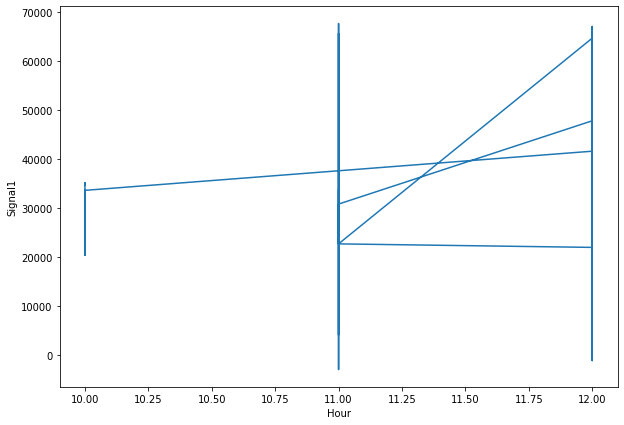

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Hour","Signal1", data=data1)
plt.xlabel('Hour')
plt.ylabel('Signal1')


Text(0, 0.5, 'Signal2')

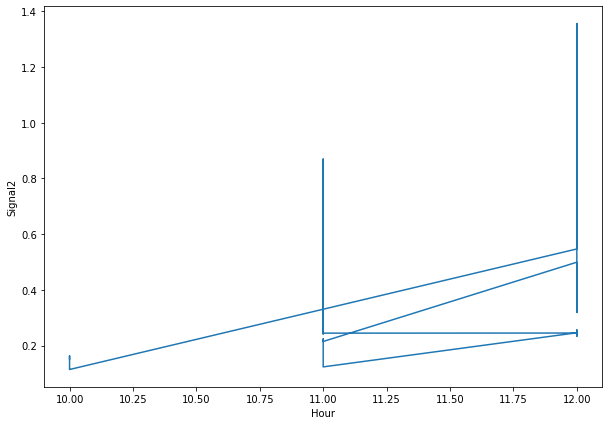

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Hour","Signal2", data=data1)
plt.xlabel('Hour')
plt.ylabel('Signal2')


Text(0.5, 0, 'Minutes')

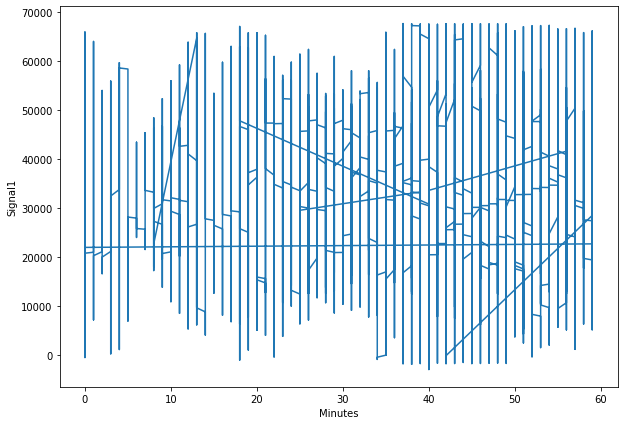

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Minutes","Signal1", data=data1)
plt.ylabel('Signal1')
plt.xlabel('Minutes')

Text(0, 0.5, 'Signal2')

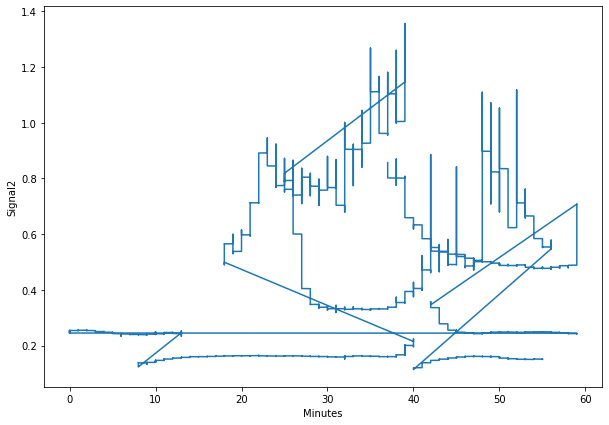

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Minutes","Signal2",data=data1)
plt.xlabel('Minutes')
plt.ylabel('Signal2')

Text(0, 0.5, 'Signal2')

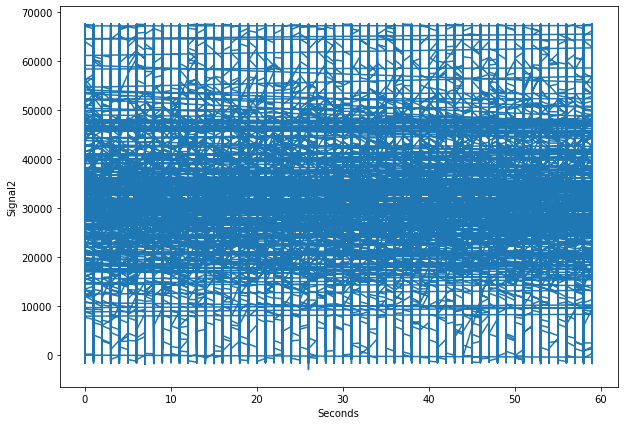

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Seconds","Signal1",data=data1)
plt.xlabel('Seconds')
plt.ylabel('Signal2')

Text(0, 0.5, 'Signal2')

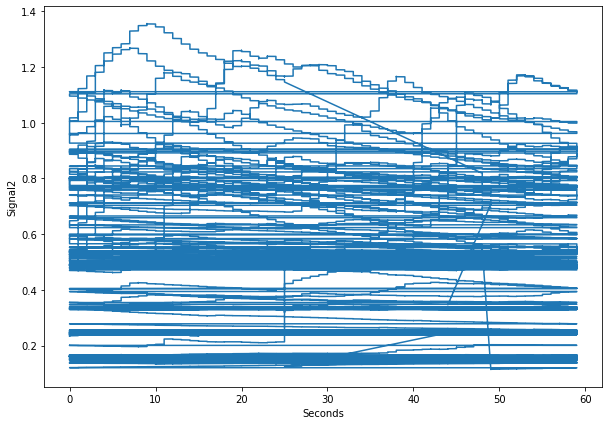

In [ ]:
plt.figure(figsize=(10,7))
plt.plot("Seconds","Signal2",data=data1)
plt.xlabel('Seconds')
plt.ylabel('Signal2')

In [ ]:
X_train = data1[data1.columns[1:3]].values

In [ ]:
X_train

array([[3.36680919e+04, 8.56725975e-01],
       [3.25649030e+04, 8.56705345e-01],
       [3.14540433e+04, 8.56683176e-01],
       ...,
       [3.46719676e+04, 1.51372892e-01],
       [3.46708779e+04, 1.51358824e-01],
       [3.46696949e+04, 1.51342453e-01]])

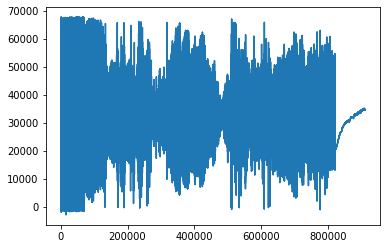

In [ ]:
plt.plot(X_train[:,0])

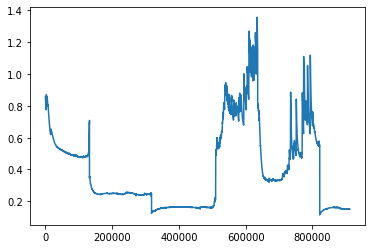

In [ ]:
plt.plot(X_train[:,1])

**Fractal Analysis with Hurst Exponent:**
The Hurst exponent is used as a measure of long-term memory of time series. In fractal geometry, the generalized Hurst Exponent has been denoted by H. The value of H in the range is 0.5-1. The Hurst exponent is referred to as the "index of dependence" or "index of long-range dependence".
H < 0.5 there are negative long-range correlations,
H = 0.5 there are no long-range correlations in the data,
H > 0.5 there are positive long-range correlations.

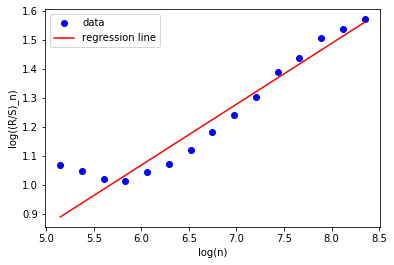

(0.7095860476116933,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([3.79872021, 3.89988682, 3.99176239, 4.10413564, 4.25611966,
         4.40177943, 4.57108295, 4.74955057, 4.92521938, 5.10781431,
         5.30889107, 5.47482893, 5.66009469, 5.80772022, 5.9575756 ]),
  array([ 0.20958605, -0.18770183])))

In [ ]:
#Calculating Hurst Exponent on Signal1
nolds.hurst_rs(X_train[:,0], nvals=None, fit=u'RANSAC', debug_plot=True, debug_data=True, plot_file=None, corrected=True, unbiased=True)

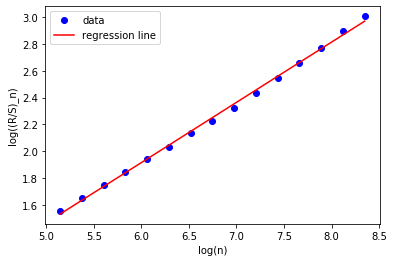

(0.9492091622165162,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([4.28336051, 4.50387115, 4.71605315, 4.93443579, 5.14859439,
         5.36055345, 5.58244975, 5.79298002, 6.01038394, 6.23949185,
         6.46238537, 6.69680269, 6.91944338, 7.16350189, 7.39235092]),
  array([ 0.44920916, -0.77975357])))

In [ ]:
#Calculating Hurst Exponent on Signal2
nolds.hurst_rs(X_train[:,1], nvals=None, fit=u'RANSAC', debug_plot=True, debug_data=True, plot_file=None, corrected=True, unbiased=True)

So the Hurst Exponent is calculated for both Signal1 and Signal2 and both gives the value of H(K) above 0.5 (signal1 0.709 and Signal2 0.949).So there is a positive long-range correlation between the data.

**Fractal Analysis using Detrended Fluctuation Analysis:**
According to this analysis,for alpha = 0.5 we have no correlation or “memory”, for 0.5 < alpha < 1 we have a memory with positive correlation and for alpha < 0.5 the correlation is negative.
If alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion.

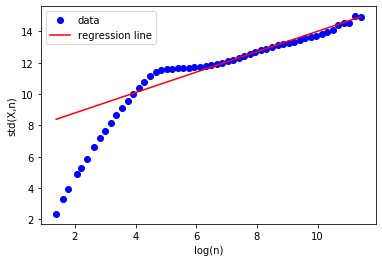

(0.652640850694372,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([ 2.34436083,  3.27103321,  3.92779327,  4.88410821,  5.25851344,
          5.87965019,  6.60391275,  7.17163376,  7.63439439,  8.14053521,
          8.6437

In [ ]:
#Claculating dfa on Signal1
nolds.dfa(X_train[:,0], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', debug_plot=True, debug_data=True, plot_file=None)

The value of alpha is 0.6526 for Signal1 data series, so here positive correlation exist between the data of Signal1.

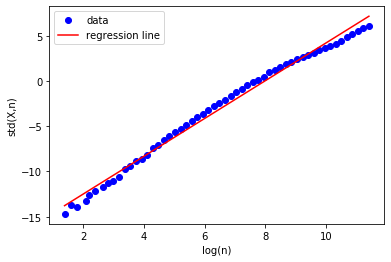

(2.0878928741158527,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([-14.69461309, -13.70601291, -13.90679284, -13.30048088,
         -12.56559258, -12.1867617 , -11.71907093, -11.29735331,
         -11.10313583, -10.632721

In [ ]:
#Calculating dfa on Signal2
nolds.dfa(X_train[:,1], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', debug_plot=True, debug_data=True, plot_file=None)

The value of alpha is 2.0878 for the Signal2 data series, therefore the process is Non Stationary.

**Analysis:**
It can be concluded that the Detrended fluctuation Analysis provides the better result wrt computational cost associated with the dfa.